In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import glob
import datetime
import random
from tqdm.notebook import tqdm
from PIL import Image
from PIL import ImageEnhance
np.random.seed(1) #to have reproducible results 
pd.set_option('display.max_colwidth', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
paths = glob.glob('/content/drive/MyDrive/Dataset neckband/class*/*.bmp', recursive=True)
len(paths)

1948

In [ ]:
paths = random.sample(paths, 20)
paths

['/content/drive/MyDrive/Dataset neckband/class1/WA01_2015_10_3_2_4_48_69792_id10.bmp',
 '/content/drive/MyDrive/Dataset neckband/class7/WA01_2015_11_30_9_44_39_948397_id3.bmp',
 '/content/drive/MyDrive/Dataset neckband/class5/WA08_2016_10_15_10_5_56_163666_id5.bmp',
 '/content/drive/MyDrive/Dataset neckband/class1/WA01_2015_11_19_16_21_11_377108_id9.bmp',
 '/content/drive/MyDrive/Dataset neckband/class3/WA01_2015_11_28_7_54_40_637520_id9.bmp',
 '/content/drive/MyDrive/Dataset neckband/class2/WA08_2017_1_7_18_32_49_779894_id7.bmp',
 '/content/drive/MyDrive/Dataset neckband/class6/WA08_2016_10_11_16_27_48_463768_id5.bmp',
 '/content/drive/MyDrive/Dataset neckband/class2/WA08_2016_10_18_12_2_9_479107_id5.bmp',
 '/content/drive/MyDrive/Dataset neckband/class2/WA08_2017_1_7_18_32_49_779894_id5.bmp',
 '/content/drive/MyDrive/Dataset neckband/class1/WA01_2015_10_2_7_8_13_295678_id10.bmp',
 '/content/drive/MyDrive/Dataset neckband/class4/WA01_2015_11_30_22_29_3_104103_id5.bmp',
 '/content/dri

In [ ]:
orig = np.array([np.asarray(Image.open(img)) for img in paths])
orig.shape

(20, 960, 1280, 3)

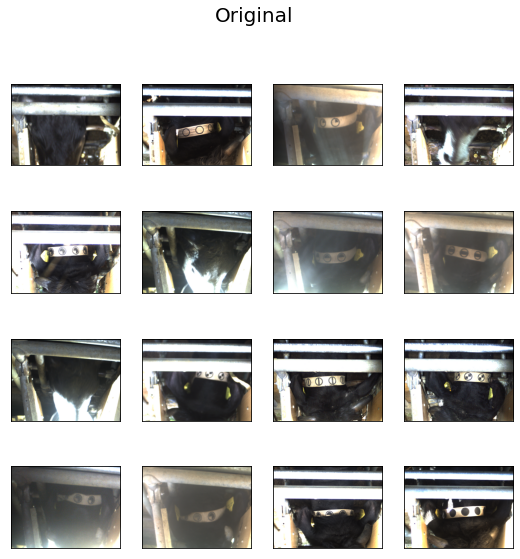

In [ ]:
plt.figure(figsize=(9,9))
i = 0
for img in orig[0:16]:
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.suptitle("Original", fontsize=20)
plt.show()

In [ ]:
# Augmenting images
contrast = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in orig]

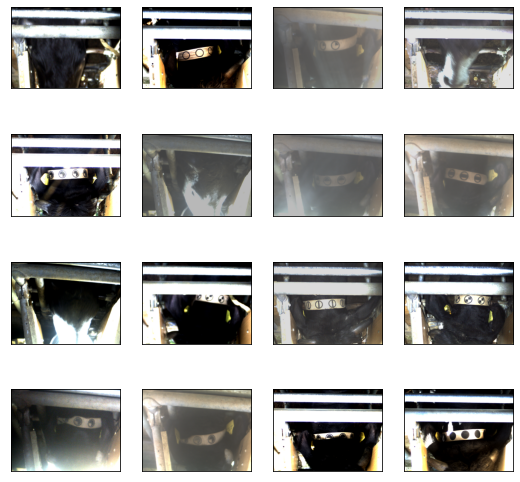

In [ ]:
plt.figure(figsize=(9,9))
i = 0
for img in contrast[0:16]:
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.show()

In [ ]:
# sequential output proses sebelumny menjadi input proses selanjutny
brightness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in contrast]
sharpness = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in brightness]
color = [np.asarray(ImageEnhance.Contrast(Image.fromarray(img, 'RGB')).enhance(np.random.choice(np.linspace(0.5, 1.5, 5)))) for img in sharpness]

In [ ]:
flip = [cv2.flip(img, np.random.choice([0, 1, -1])) if np.random.choice([0, 1]) else img for img in color]

In [ ]:
rotate = [Image.fromarray(img, 'RGB').rotate(np.random.choice([0, 90, 180, 270])) for img in flip]

In [ ]:
augmented_img = rotate

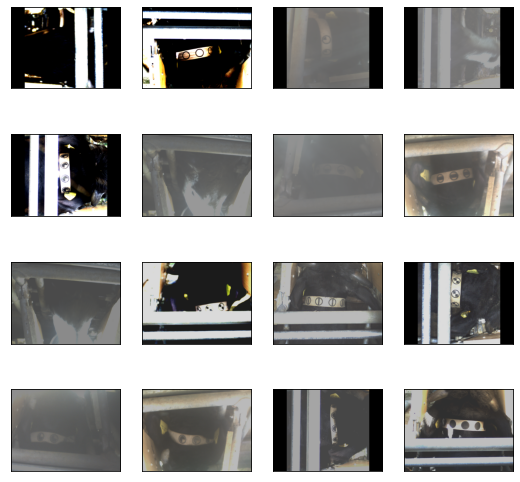

In [ ]:
plt.figure(figsize=(9,9))
i = 0
for img in augmented_img[0:16]:
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img)
    i += 1
plt.show()